<a href="https://colab.research.google.com/github/MukRodrigues/Simulacao-difusao-reacao/blob/main/GITHUB_Simulacao_equacao_difusao_reacao_malthus_met_explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from numpy import exp, sin, pi, shape
import matplotlib.pyplot as plt
from matplotlib import cm

## Simulação


Vamos fazer a simulação do problema de contorno/inicial

\begin{equation}
\left\{
\begin{array}{cl}
\displaystyle \frac{\partial \rho}{\partial t}(x,t) &= \   \ \displaystyle \frac{\partial}{\partial x} \left( D(x,K) \frac{\partial \rho}{\partial x}(x,t)    \right) + r(t) \rho(x,t),     \\
\displaystyle  \rho  (0,t) \ \ &= \ \ \displaystyle
   \rho (L,t) \ \ = \ \ 0,   \quad \hskip1cm t \in [0, +\infty)
 \\
  \rho(x,0)\ \ &= \  \displaystyle \frac{N_0}{b-a}\chi _{[a,b]}, \quad  \hskip2.4cm x \in [a,b] \subset (0, L), \ a \neq b.  %\frac{N_0}{L}, \qquad  \hskip2.4cm x \in (0, L)
\end{array}
\right.
\end{equation}

usando o método numérico *forward time-centered space*.

In [15]:
# Parâmetros ajustados para estabilidade
L = 1
T = 1

h = 0.1  # Redução do espaçamento dx para estabilidade
k = 0.0002  # Redução do espaçamento dt para estabilidade
steps = int(T / k)

# Malha
x = np.arange(0, L + h, h)
x0 = (min(x) + max(x))/2
t = np.arange(0, T + k, k)
n = len(x)
m = len(t)

#### Parâmetros

In [16]:
# Parâmetros do modelo
D0 = 0.5
k1 = 2.0
k2 = 0.2*k1
r1 = 4.0
r2 = 0.4*r1
N0 = 5

# Períodos
pr = T/3.5
pk = T/2.5

# Funções do problema
K = k1 + k2 * np.sin(2 * np.pi * t / pk)
r = r1 + r2 * np.sin(2 * np.pi * t / pr)

# Difusividade D(x,t) e sua derivada Dx
D = np.zeros((n, m))
Dx = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        D[i, j] = D0 * (exp(-K[j]*(x0 - x[i])**2 ))
        Dx[i, j] =  (-2)*(K[j])*(-x0 + x[i])* D[i,j]

# Matrizes A1 e A2
A1 = np.zeros((n, m))
A2 = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        A1[i, j] = k * Dx[i, j] / (2 * h)
        A2[i, j] = k * D[i, j] / (h ** 2)


In [17]:
# Condição Inicial
rho = np.zeros((n, m))  # Matriz da densidade populacional

a = 0.3  # início do suporte
b = .7 # fim do suporte
rho[:, 0] = np.where((x >= a) & (x <= b), N0 / (b - a), 0)

# Condição de contorno
rho[0, :] = 0
rho[-1, :] = 0

#### Cálculo dos incrementos

\begin{equation}
   \rho^{j+1}_{i} =  \left( \gamma D_x \ ^{j}_{i} + \lambda  D \ ^{j}_{i} \right)\rho^{j}_{i+1} \ + \left( \gamma D_x \ ^{j}_{i} - 2\lambda  D \ ^{j}_{i} \right)\rho^{j}_{i} + \left( - \gamma D_x \ ^{j}_{i} + \lambda  D \ ^{j}_{i} \right)\rho^{j}_{i-1} +  k  r^{j} \rho^{j} _{i}
\end{equation}

In [18]:
# Atualização da densidade usando esquema explícito
for j in range(m - 1):
    for i in range(1, n - 1):
        rho[i, j + 1] = (
            rho[i + 1, j] * (A1[i, j] + A2[i, j])
            + rho[i, j] * (1 - 2 * A2[i, j] + A1[i, j])
            + rho[i - 1, j] * (A2[i, j] - A1[i, j])
            + r[j] * k * rho[i, j]
        )

#### Gráfico

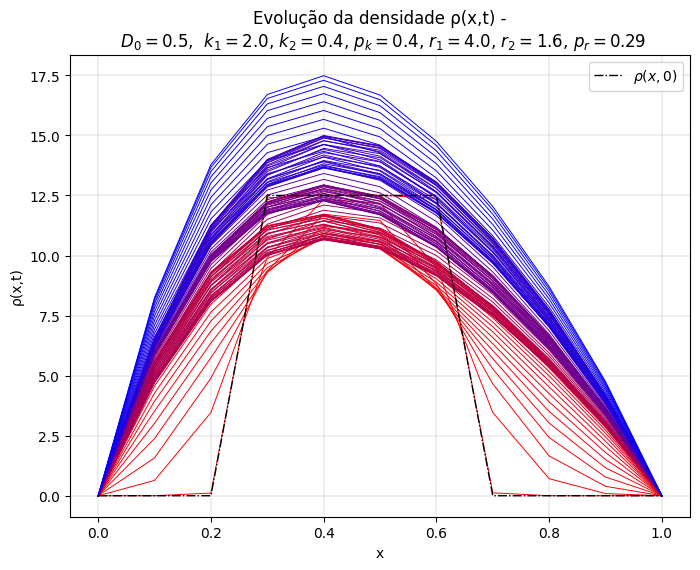

In [19]:
from os import linesep
# Plotagem da solução
plt.figure(figsize=(8, 6))
colors = [(1 - i/m, 0, i/m) for i in range(m)]

for j in range(1, m, max(1, m // 100)):
    plt.plot(x, rho[:, j],linewidth=0.7,color=colors[j])

plt.plot(x, rho[:, 0], label="$\\rho(x,0)$",linestyle='-.', linewidth=1,color='black')
#,  ,
plt.xlabel("x")
plt.ylabel("ρ(x,t)")
plt.title(f"Evolução da densidade ρ(x,t) -\n $D_0=${D0},  $k_1 =${k1}, $k_2 =${round(k2,2)}, $p_k=${round(pk,2)}, $r_1 =${r1}, $r_2 =${round(r2,2)}, $p_r=${round(pr,2)}")
#, $p_k=${round(pk,2)},  $k_1 =${k1}, $k_2 =${round(k2,2)}, $p_k=${round(pk,2)}
#plt.ylim(0,50)
plt.grid(linestyle='-', linewidth=0.3)
#plt.arrow(0.5,14.7+0.5,0,0.3, head_width=0.03,head_length=0.2, color='black') #setinha
plt.legend()
#plt.savefig('difusao-_variavel_crecimento_malthus')  #para salvar a figura
plt.show()